CENP_B_ds_redWt Vs CENP_B_ds_red Q1012 

In [2]:
# import necessary modules
from skimage import io
import matplotlib.pyplot as plt
import numpy as np
import skimage.filters as filters
import skimage.color as color
from PIL import Image
import pandas as pd
from skimage.util import img_as_float
from skimage.color import label2rgb, rgb2gray,gray2rgb
from skimage import segmentation,morphology,feature,measure,filters
from scipy import ndimage as ndi
import glob
from natsort import natsorted 
import os
import glob
import re

In [3]:
# import function file
%run functions-Cytoplasm-Method2.ipynb

In [4]:
# path to the local folder for the notebooks
BASE_DIR="/Users/Trupti/01-LIDo/02-VijiProject/ImageAnalysis/" 
#path to the image folder

FOLDER="set4"
IMAGE_DIR=BASE_DIR + "data/AMovie/" + FOLDER + "/"
CSV_DIR = BASE_DIR + "AnalysisMethods/AnalysisResults/AMovie/" + FOLDER +"/" + "csvs/"



#### A List for the Images Folders

In [5]:
wt=[]
ctrl=[]
wt_path = IMAGE_DIR + 'wt'
ctrl_path=IMAGE_DIR + 'control'

for folder in glob.glob(wt_path + '/*'):
    wt.append(wt_path + '/' + folder.split('/')[-1].split('.')[0])
for folder in glob.glob(ctrl_path + '/*'):
    ctrl.append(ctrl_path + '/' + folder.split('/')[-1].split('.')[0])     


In [6]:
ctrl

['/Users/Trupti/01-LIDo/02-VijiProject/ImageAnalysis/data/AMovie/set4/control/Exp2018_032_IV_HeLa_MG132_YFP-AstrinqQ1012_CENPB-dsRed_GFP_mcherry01_R3D_D3D',
 '/Users/Trupti/01-LIDo/02-VijiProject/ImageAnalysis/data/AMovie/set4/control/Exp2018_032_IV_HeLa_MG132_YFP-AstrinqQ1012_CENPB-dsRed_GFP_mcherry03_R3D_D3D',
 '/Users/Trupti/01-LIDo/02-VijiProject/ImageAnalysis/data/AMovie/set4/control/Exp2018_032_IV_HeLa_MG132_YFP-AstrinqQ1012_CENPB-dsRed_GFP_mcherry02_R3D_D3D']

In [8]:
# For wt

for i in range(len(wt)):
    
    df_YFP_astrin,df_CENP_B_ds_red,YFP_astrin_cyto,CENP_B_ds_red_cyto,YFP_astrin_bg,CENP_B_ds_red_bg=method_cenpb(wt[i])
    
    df=pd.merge(df_YFP_astrin, df_CENP_B_ds_red,  how='outer',on=['label']
                                                       ,suffixes=('_YFP_astrin', '_CENP_B_ds_red'))
    df['YFP_astrin_cyto']=YFP_astrin_cyto
    df['CENP_B_ds_red_cyto']=CENP_B_ds_red_cyto
    df['YFP_astrin_bg']=YFP_astrin_bg
    df['CENP_B_ds_red_bg']=CENP_B_ds_red_bg
    
    directory=wt[i].split('/')[-1].split('.')[0] # to create a folder per experiment to save csvs
    path = CSV_DIR + 'wt/' + directory
    try:
        os.makedirs(path)
    except FileExistsError:
    # directory already exists
        pass
    #pd.concat([df1,df_cdki,df_dmso],ignore_index=True)
    check_nan_in_df = df.isnull().values.any()
    print("There are %d NaN values in %s " %(check_nan_in_df , directory))
    df.to_csv(path + '/' + 'CENP_B_particles'+'.csv') 
   

There are 0 NaN values in Exp2018_032_IV_HeLa_MG132_YFP-AstrinWT_CENPB-dsRed_GFP_mcherry02_R3D_D3D 
There are 0 NaN values in Exp2018_032_IV_HeLa_MG132_YFP-AstrinWT_CENPB-dsRed_GFP_mcherry03_R3D_D3D 
There are 0 NaN values in Exp2018_032_IV_HeLa_MG132_YFP-AstrinWT_CENPB-dsRed_GFP_mcherry01_R3D_D3D 


In [9]:
# For control

for i in range(len(ctrl)):
    
    df_YFP_astrin,df_CENP_B_ds_red,YFP_astrin_cyto,CENP_B_ds_red_cyto,YFP_astrin_bg,CENP_B_ds_red_bg=method_cenpb(ctrl[i])
    
    df=pd.merge(df_YFP_astrin, df_CENP_B_ds_red,  how='outer',on=['label']
                                                       ,suffixes=('_YFP_astrin', '_CENP_B_ds_red'))
    df['YFP_astrin_cyto']=YFP_astrin_cyto
    df['CENP_B_ds_red_cyto']=CENP_B_ds_red_cyto
    df['YFP_astrinbg']=YFP_astrin_bg
    df['CENP_B_ds_red_bg']=CENP_B_ds_red_bg
    
    directory=ctrl[i].split('/')[-1].split('.')[0] # to create a folder per experiment to save csvs
    path = CSV_DIR + 'ctrl/' + directory
    try:
        os.makedirs(path)
    except FileExistsError:
    # directory already exists
        pass
    #pd.concat([df1,df_cdki,df_dmso],ignore_index=True)
    check_nan_in_df = df.isnull().values.any()
    print("There are %d NaN values in %s " %(check_nan_in_df , directory))
    df.to_csv(path + '/' + 'CENP_B_particles'+'.csv') 
   

There are 0 NaN values in Exp2018_032_IV_HeLa_MG132_YFP-AstrinqQ1012_CENPB-dsRed_GFP_mcherry01_R3D_D3D 
There are 0 NaN values in Exp2018_032_IV_HeLa_MG132_YFP-AstrinqQ1012_CENPB-dsRed_GFP_mcherry03_R3D_D3D 
There are 0 NaN values in Exp2018_032_IV_HeLa_MG132_YFP-AstrinqQ1012_CENPB-dsRed_GFP_mcherry02_R3D_D3D 


### Plots

In [10]:
import seaborn as sns
#sns.set_style("whitegrid")
#sns.set_context("notebook",font_scale=1.5, rc={"lines.linewidth":2.5})

# path to save graphs
GRAPH_DIR=BASE_DIR + "AnalysisMethods/AnalysisResults/AMovie/" + FOLDER + "/" + "graphs/"




In [11]:
# plot graphs 
# dmso vs cdki
# The paths are for the generated csv files
wt_csv=[]
ctrl_csv=[]
wt_path = CSV_DIR + 'wt'
ctrl_path=CSV_DIR + 'ctrl'

for folder in natsorted(glob.glob(wt_path + '/*')):
    wt_csv.append(wt_path + '/' + folder.split('/')[-1].split('.')[0])
    
for folder in natsorted(glob.glob(ctrl_path + '/*')):
    ctrl_csv.append(ctrl_path + '/' + folder.split('/')[-1].split('.')[0])  
ctrl_csv   

['/Users/Trupti/01-LIDo/02-VijiProject/ImageAnalysis/AnalysisMethods/AnalysisResults/AMovie/set4/csvs/ctrl/Exp2018_032_IV_HeLa_MG132_YFP-AstrinqQ1012_CENPB-dsRed_GFP_mcherry01_R3D_D3D',
 '/Users/Trupti/01-LIDo/02-VijiProject/ImageAnalysis/AnalysisMethods/AnalysisResults/AMovie/set4/csvs/ctrl/Exp2018_032_IV_HeLa_MG132_YFP-AstrinqQ1012_CENPB-dsRed_GFP_mcherry02_R3D_D3D',
 '/Users/Trupti/01-LIDo/02-VijiProject/ImageAnalysis/AnalysisMethods/AnalysisResults/AMovie/set4/csvs/ctrl/Exp2018_032_IV_HeLa_MG132_YFP-AstrinqQ1012_CENPB-dsRed_GFP_mcherry03_R3D_D3D']

In [12]:
# read both csvs to a dataframe
cell_count=0
df_graph=pd.DataFrame()
for i in range(len(ctrl_csv)):
    df_wt_bg=pd.read_csv(wt_csv[i]+'/'+'CENP_B_Particles.csv')
    df_temp_wt=pd.DataFrame(data=(df_wt_bg['mean_intensity_CENP_B_ds_red']))
    df_temp_wt['mean_intensity_YFP_astrin']=df_wt_bg['mean_intensity_YFP_astrin']
    df_temp_wt['CENP_B_ds_red@kt/CENP_B_ds_red@cyto']= df_wt_bg['mean_intensity_CENP_B_ds_red']/df_wt_bg['CENP_B_ds_red_cyto']
    df_temp_wt['YFP_astrin@kt/YFP_astrin@cyto']= df_wt_bg['mean_intensity_YFP_astrin']/df_wt_bg['YFP_astrin_cyto']
    df_temp_wt['CENP_B_ds_red@kt/CENP_B_ds_red@cyto:YFP_astrin@kt/YFP_astrin@cyto']= df_temp_wt['CENP_B_ds_red@kt/CENP_B_ds_red@cyto'] / df_temp_wt['YFP_astrin@kt/YFP_astrin@cyto']
    df_temp_wt['condition']='WildType'
    expt_name=re.sub(r'^.+/([^/]+)$', r'\1', wt_csv[i])
    df_temp_wt['Experiment']= expt_name#'cdki_%d'%i
    
    df_ctrl_bg=pd.read_csv(ctrl_csv[i]+'/'+'CENP_B_Particles.csv')
    df_temp_ctrl=pd.DataFrame(data=(df_ctrl_bg['mean_intensity_CENP_B_ds_red']))
    df_temp_ctrl['mean_intensity_YFP_astrin']=df_ctrl_bg['mean_intensity_YFP_astrin']
    df_temp_ctrl['CENP_B_ds_red@kt/CENP_B_ds_red@cyto']= df_ctrl_bg['mean_intensity_CENP_B_ds_red']/df_ctrl_bg['CENP_B_ds_red_cyto']
    df_temp_ctrl['YFP_astrin@kt/YFP_astrin@cyto']= df_ctrl_bg['mean_intensity_YFP_astrin']/df_ctrl_bg['YFP_astrin_cyto']
    df_temp_ctrl['CENP_B_ds_red@kt/CENP_B_ds_red@cyto:YFP_astrin@kt/YFP_astrin@cyto']= df_temp_ctrl['CENP_B_ds_red@kt/CENP_B_ds_red@cyto'] / df_temp_ctrl['YFP_astrin@kt/YFP_astrin@cyto']
    df_temp_ctrl['condition']='Q1012'
    expt_name=re.sub(r'^.+/([^/]+)$', r'\1', ctrl_csv[i])
    df_temp_ctrl['Experiment']= expt_name#'cdki_%d'%i
    
  
   
   
    
    df_graph=pd.concat([df_graph,df_temp_ctrl,df_temp_wt],ignore_index=True)
    df_graph['YFP_astrin@kt/YFP_astrin@cyto:CENP_B_ds_red@kt/CENP_B_ds_red@cyto']= 1/ df_graph['CENP_B_ds_red@kt/CENP_B_ds_red@cyto:YFP_astrin@kt/YFP_astrin@cyto']
    
    cell_count+=1

df_graph.head()

,mean_intensity_CENP_B_ds_red,mean_intensity_YFP_astrin,CENP_B_ds_red@kt/CENP_B_ds_red@cyto,YFP_astrin@kt/YFP_astrin@cyto,CENP_B_ds_red@kt/CENP_B_ds_red@cyto:YFP_astrin@kt/YFP_astrin@cyto,condition,Experiment,YFP_astrin@kt/YFP_astrin@cyto:CENP_B_ds_red@kt/CENP_B_ds_red@cyto
0,10844.113426,17560.521296,0.889125,1.480800,0.600436,Q1012,Exp2018_032_IV_HeLa_MG132_YFP-AstrinqQ1012_CEN...,1.665458
1,9155.272727,13990.090909,0.750654,1.179721,0.636298,Q1012,Exp2018_032_IV_HeLa_MG132_YFP-AstrinqQ1012_CEN...,1.571591
2,10825.583333,13735.166667,0.887606,1.158225,0.766350,Q1012,Exp2018_032_IV_HeLa_MG132_YFP-AstrinqQ1012_CEN...,1.304887
3,11006.598337,17826.137965,0.902447,1.503198,0.600352,Q1012,Exp2018_032_IV_HeLa_MG132_YFP-AstrinqQ1012_CEN...,1.665691
4,9911.928571,13984.928571,0.812694,1.179286,0.689140,Q1012,Exp2018_032_IV_HeLa_MG132_YFP-AstrinqQ1012_CEN...,1.451083


In [13]:
# count the number of KTs in CDKi and DMSO
ctrl = df_graph[df_graph['condition']=='Q1012'].shape[0]
wt = df_graph[df_graph['condition']=='WildType'].shape[0]

### CENP_B_ds_red@kt/CENP_B_ds_red@cyto

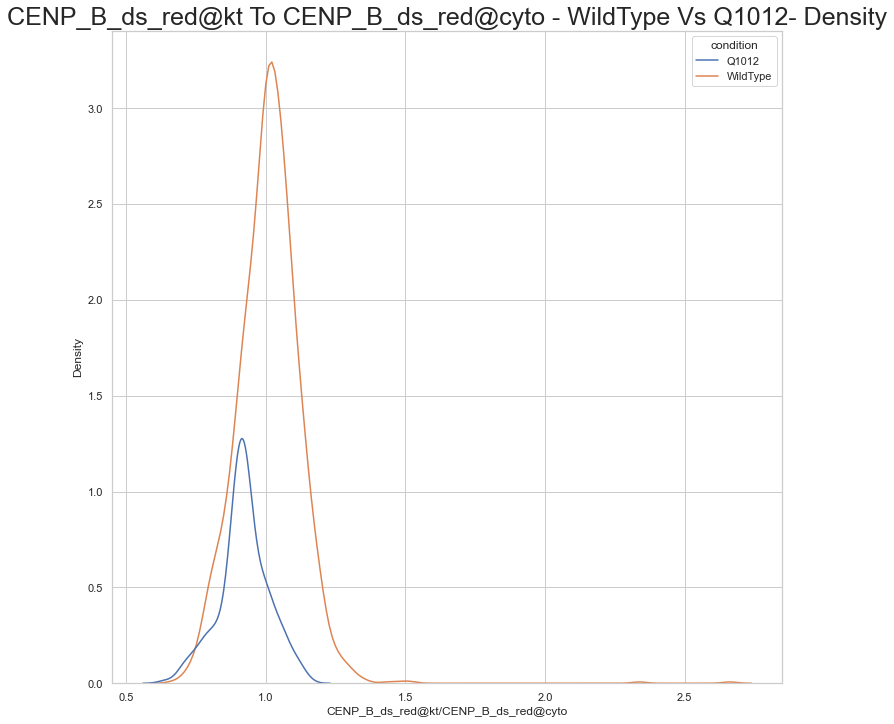

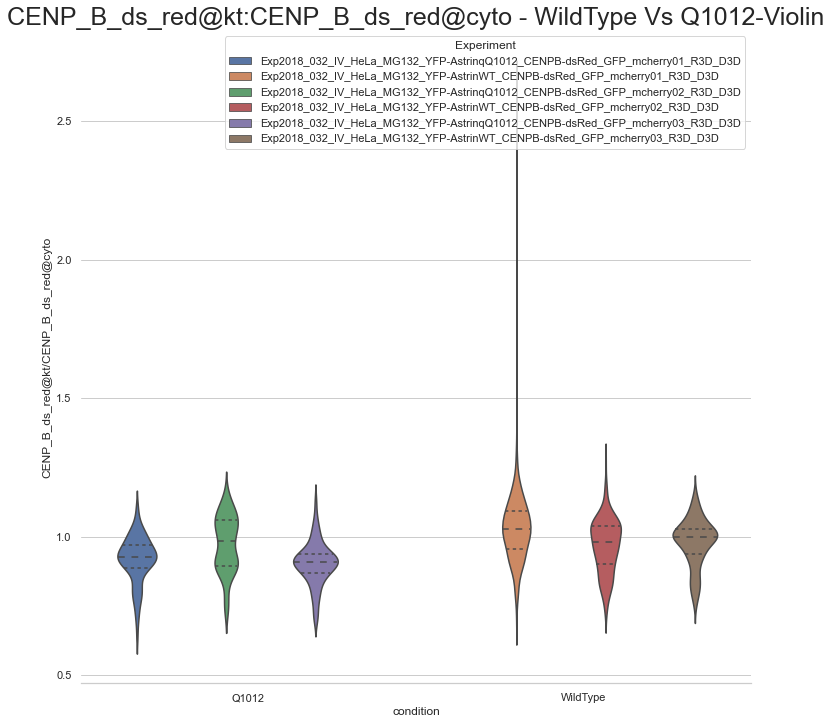

In [14]:
import seaborn as sns

title="CENP_B_ds_red@kt To CENP_B_ds_red@cyto - WildType Vs Q1012- Density"
plt.figure(figsize=(12,12))
sns.set_theme(style="whitegrid")

sns_plot=sns.kdeplot(data=df_graph, x="CENP_B_ds_red@kt/CENP_B_ds_red@cyto",hue='condition').set_title(title,fontsize=25)
sns_plot.figure.savefig(GRAPH_DIR+title, bbox_inches="tight",dpi=300)


title="CENP_B_ds_red@kt:CENP_B_ds_red@cyto - WildType Vs Q1012-Violin"
plt.figure(figsize=(12,12))
sns.set_theme(style="whitegrid")


# Draw a nested violinplot and split the violins for easier comparison
sns_plot=sns.violinplot(data=df_graph, x="condition", y="CENP_B_ds_red@kt/CENP_B_ds_red@cyto", hue="Experiment",
              inner="quart",
               ).set_title(title,fontsize=25)

sns_plot.figure.savefig(GRAPH_DIR+title, bbox_inches="tight",dpi=300)
sns.despine(left=True)





## YFP_astrin@kt:YFP_astrin@cyto

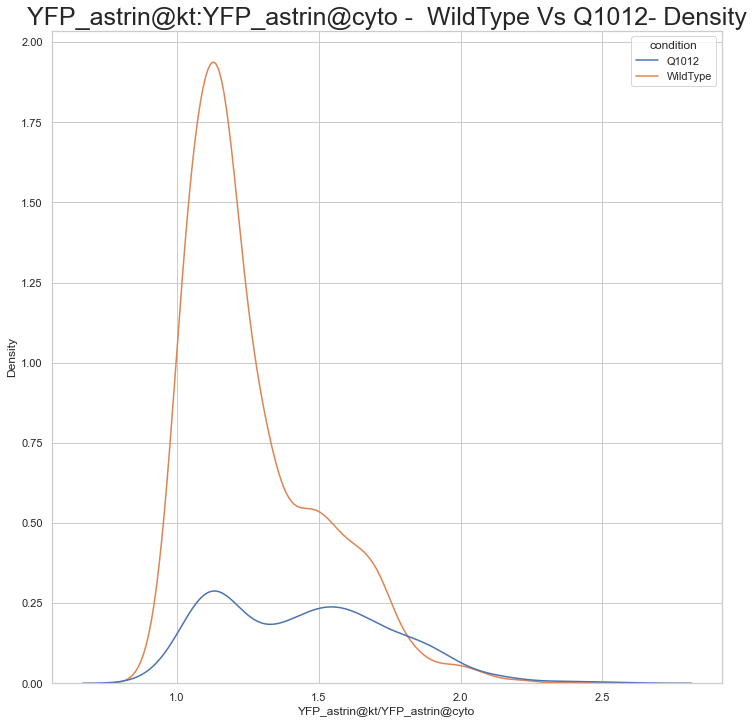

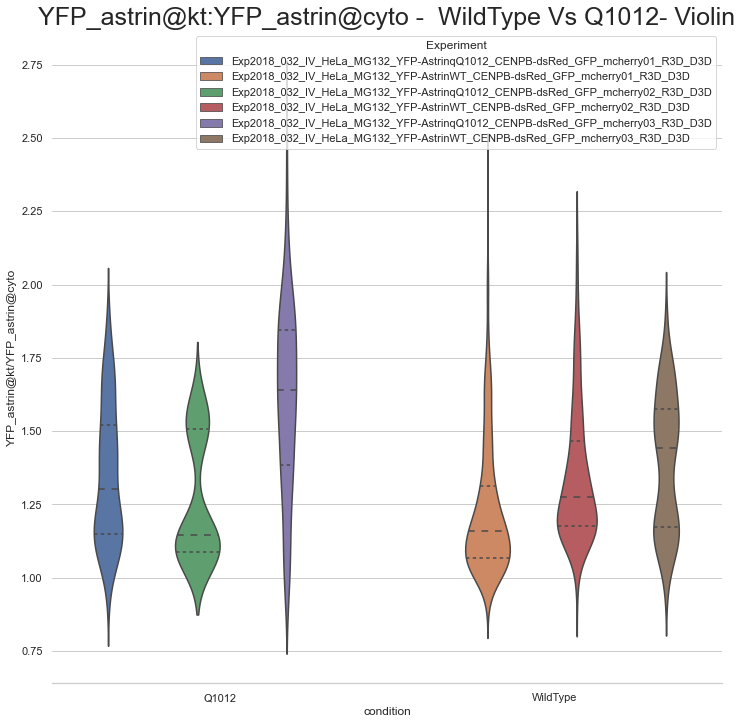

In [15]:

title="YFP_astrin@kt:YFP_astrin@cyto -  WildType Vs Q1012- Density"
plt.figure(figsize=(12,12))
sns.set_theme(style="whitegrid")

sns_plot=sns.kdeplot(data=df_graph, x="YFP_astrin@kt/YFP_astrin@cyto",hue='condition').set_title(title,fontsize=25)
sns_plot.figure.savefig(GRAPH_DIR+title, bbox_inches="tight",dpi=300)

title="YFP_astrin@kt:YFP_astrin@cyto -  WildType Vs Q1012- Violin"
plt.figure(figsize=(12,12))
sns.set_theme(style="whitegrid")
# Draw a nested violinplot and split the violins for easier comparison
sns_plot=sns.violinplot(data=df_graph, x="condition", y="YFP_astrin@kt/YFP_astrin@cyto", hue="Experiment",
              inner="quart",
               ).set_title(title,fontsize=25)

sns_plot.figure.savefig(GRAPH_DIR+title, bbox_inches="tight",dpi=300)
sns.despine(left=True)

plt.show()

## CENP_B_ds_red@kt:CENP_B_ds_red@cyto To YFP_astrin@kt:YFP_astrin@cyto

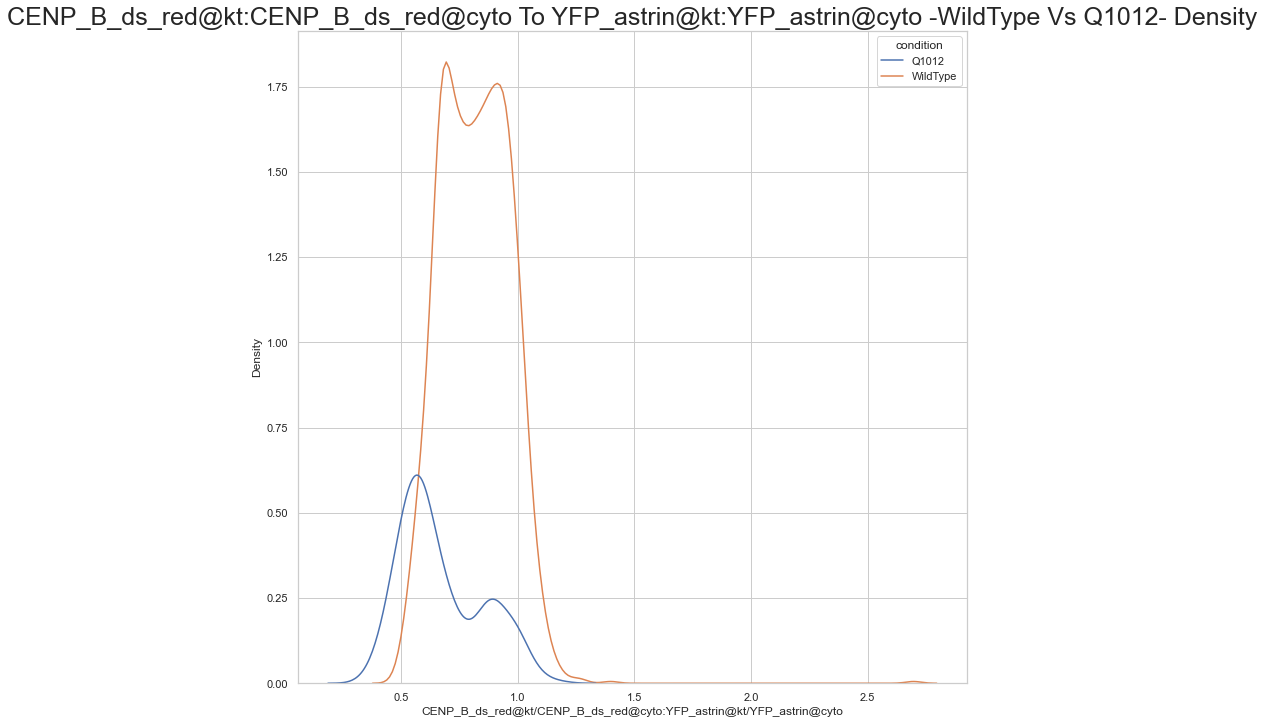

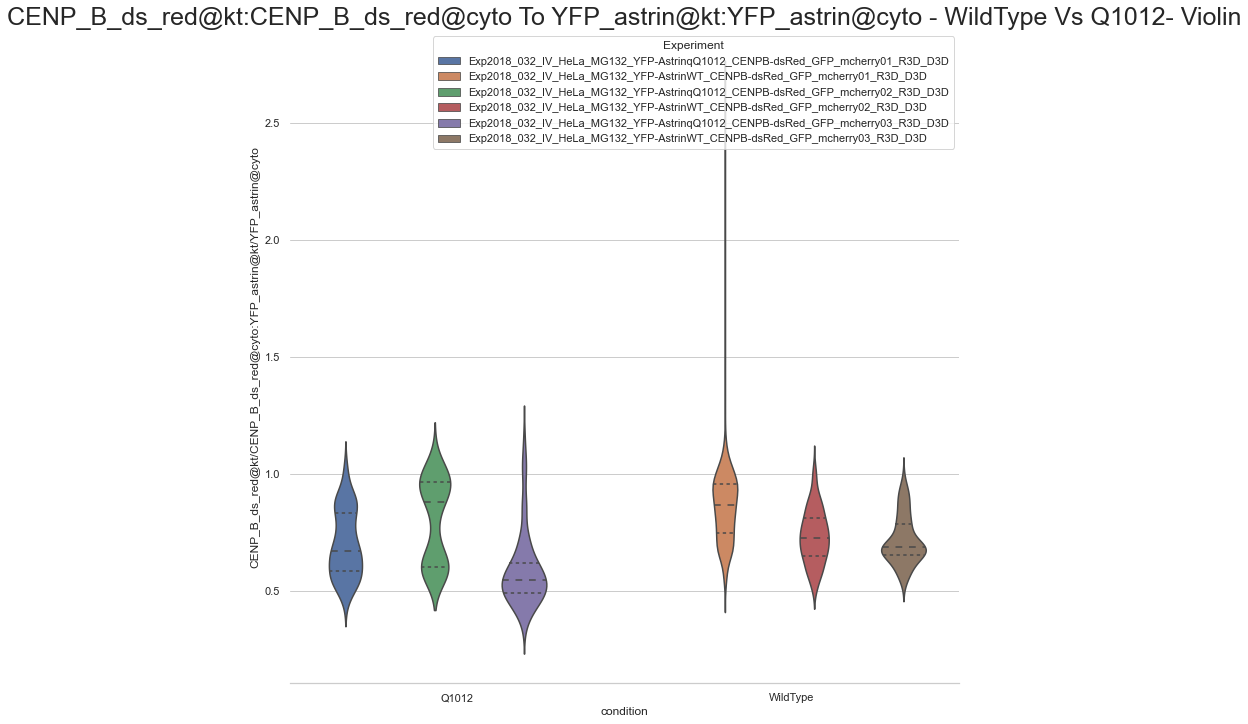

In [16]:
import seaborn as sns
title="CENP_B_ds_red@kt:CENP_B_ds_red@cyto To YFP_astrin@kt:YFP_astrin@cyto -WildType Vs Q1012- Density"
plt.figure(figsize=(12,12))
sns.set_theme(style="whitegrid")

sns_plot=sns.kdeplot(data=df_graph, x="CENP_B_ds_red@kt/CENP_B_ds_red@cyto:YFP_astrin@kt/YFP_astrin@cyto",hue='condition').set_title(title,fontsize=25)
sns_plot.figure.savefig(GRAPH_DIR+title, bbox_inches="tight",dpi=300)

title="CENP_B_ds_red@kt:CENP_B_ds_red@cyto To YFP_astrin@kt:YFP_astrin@cyto - WildType Vs Q1012- Violin"
plt.figure(figsize=(12,12))
sns.set_theme(style="whitegrid")
# Draw a nested violinplot and split the violins for easier comparison
sns_plot=sns.violinplot(data=df_graph, x="condition", y="CENP_B_ds_red@kt/CENP_B_ds_red@cyto:YFP_astrin@kt/YFP_astrin@cyto", hue="Experiment",
              inner="quart",
               ).set_title(title,fontsize=25)

sns_plot.figure.savefig(GRAPH_DIR+title, bbox_inches="tight",dpi=300)
sns.despine(left=True)

plt.show()

## YFP_astrin@kt/YFP_astrin@cyto:CENP_B_ds_red@kt/CENP_B_ds_red@cyto

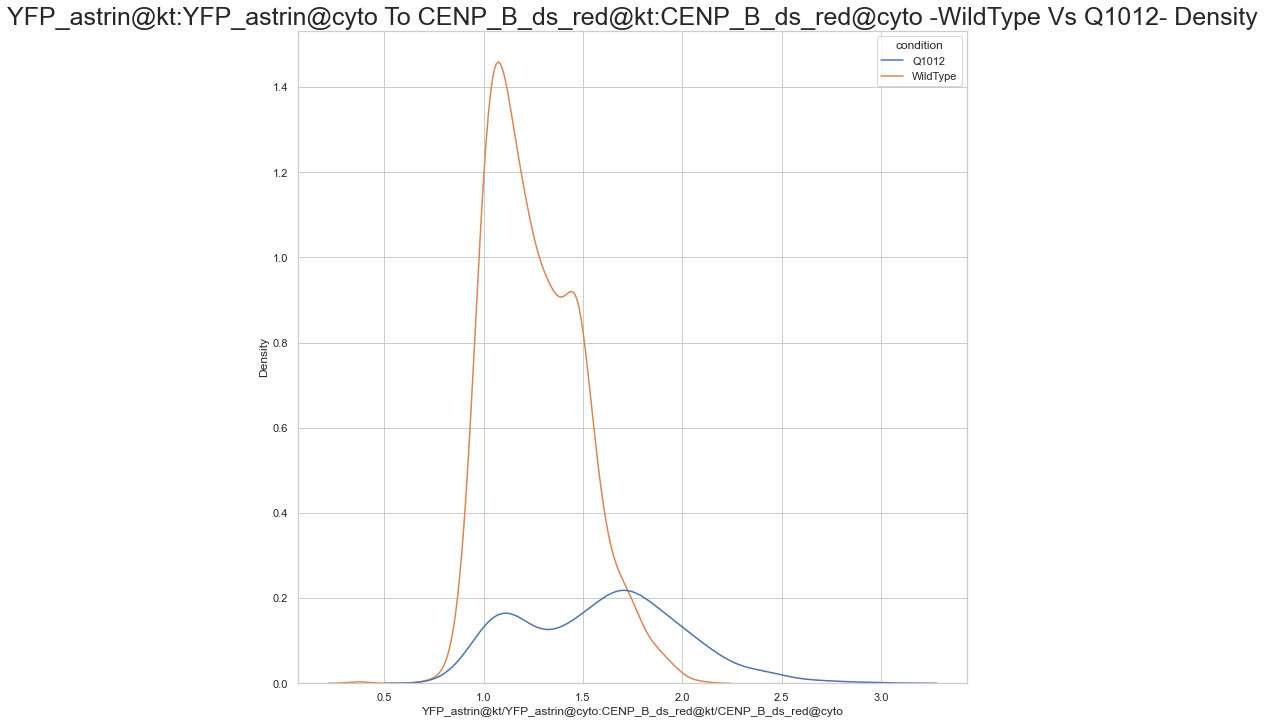

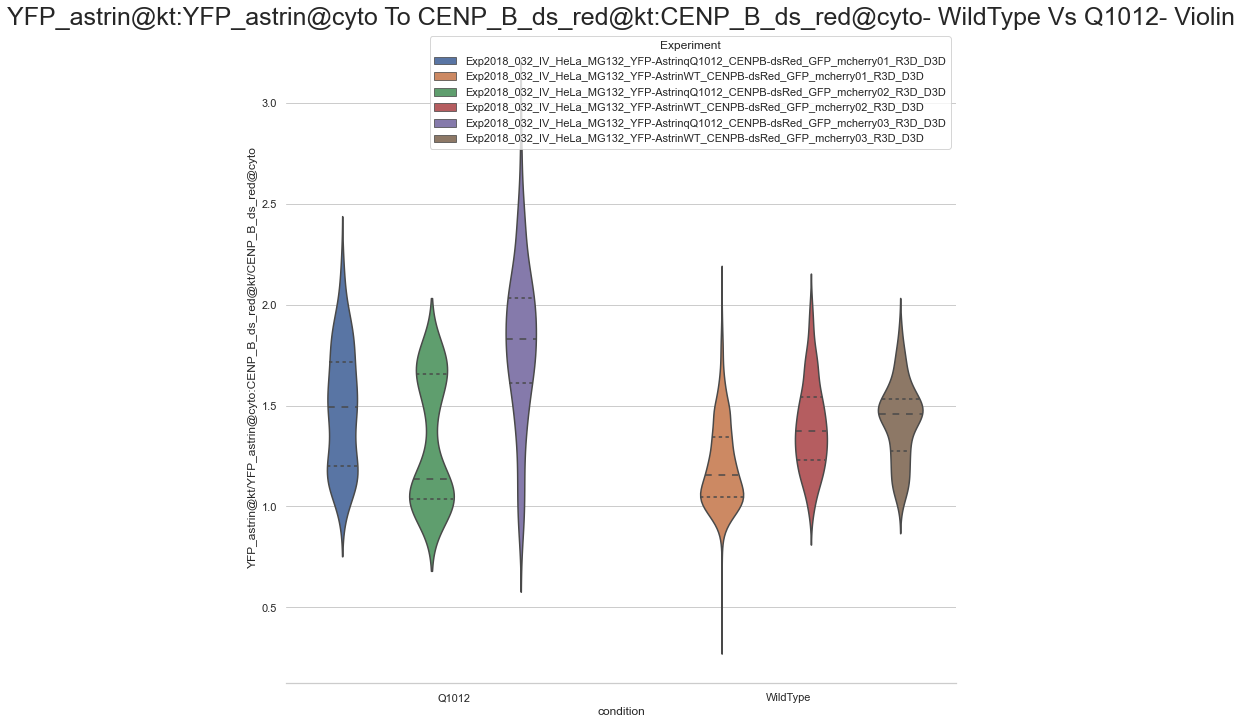

In [17]:
import seaborn as sns
title="YFP_astrin@kt:YFP_astrin@cyto To CENP_B_ds_red@kt:CENP_B_ds_red@cyto -WildType Vs Q1012- Density"
plt.figure(figsize=(12,12))
sns.set_theme(style="whitegrid")

sns_plot=sns.kdeplot(data=df_graph, x="YFP_astrin@kt/YFP_astrin@cyto:CENP_B_ds_red@kt/CENP_B_ds_red@cyto",hue='condition').set_title(title,fontsize=25)
sns_plot.figure.savefig(GRAPH_DIR+title, bbox_inches="tight",dpi=300)

title="YFP_astrin@kt:YFP_astrin@cyto To CENP_B_ds_red@kt:CENP_B_ds_red@cyto- WildType Vs Q1012- Violin"
plt.figure(figsize=(12,12))
sns.set_theme(style="whitegrid")
# Draw a nested violinplot and split the violins for easier comparison
sns_plot=sns.violinplot(data=df_graph, x="condition", y='YFP_astrin@kt/YFP_astrin@cyto:CENP_B_ds_red@kt/CENP_B_ds_red@cyto', hue="Experiment",
              inner="quart",
               ).set_title(title,fontsize=25)

sns_plot.figure.savefig(GRAPH_DIR+title, bbox_inches="tight",dpi=300)
sns.despine(left=True)

plt.show()

<Figure size 1080x1080 with 0 Axes>

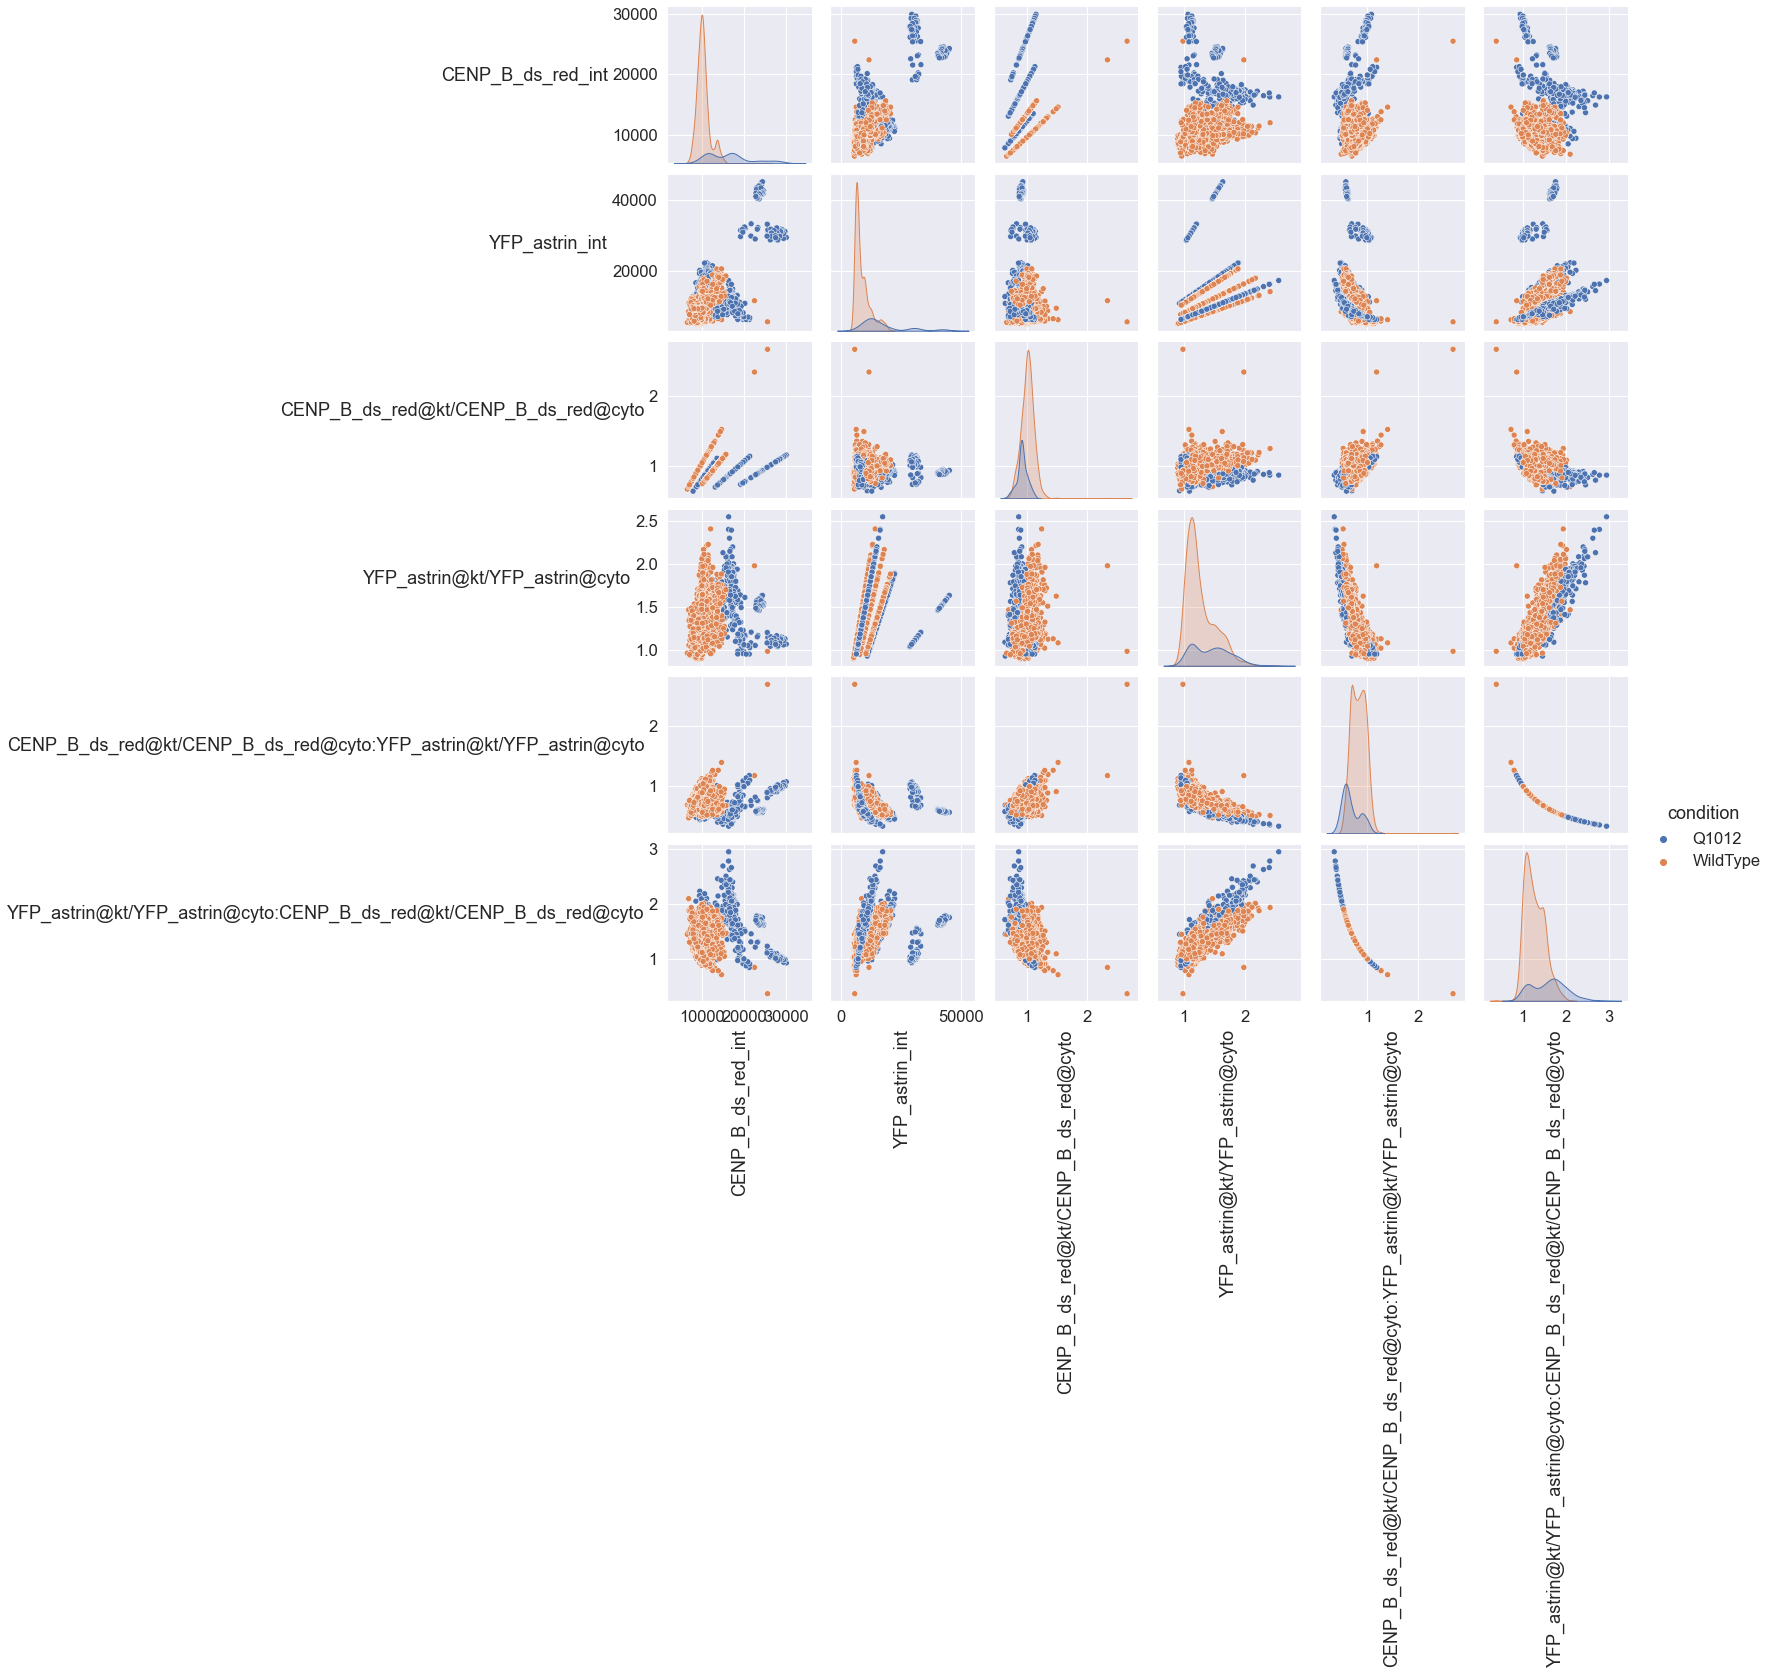

In [19]:
plt.figure(figsize=(15,15))
sns.set(font_scale=1.5)
title='PairPlot - Condition'
sns_plot=sns.pairplot(df_graph, hue="condition")

replacements = {'mean_intensity_CENP_B_ds_red': 'CENP_B_ds_red_int', 
                'mean_intensity_YFP_astrin': 'YFP_astrin_int',
                'YFP_astrin@kt/YFP_astrin@cyto': 'YFP_astrin@kt/YFP_astrin@cyto',
                'CENP_B_ds_red@kt/CENP_B_ds_red@cyto': 'CENP_B_ds_red@kt/CENP_B_ds_red@cyto',
                'YFP_astrin@kt/YFP_astrin@cyto:CENP_B_ds_red@kt/CENP_B_ds_red@cyto':'YFP_astrin@kt/YFP_astrin@cyto:CENP_B_ds_red@kt/CENP_B_ds_red@cyto',
               'CENP_B_ds_red@kt/CENP_B_ds_red@cyto:YFP_astrin@kt/YFP_astrin@cyto':'CENP_B_ds_red@kt/CENP_B_ds_red@cyto:YFP_astrin@kt/YFP_astrin@cyto'}
for i in range(6):
    for j in range(6):
        xlabel = sns_plot.axes[i][j].get_xlabel()
        ylabel = sns_plot.axes[i][j].get_ylabel()
        if xlabel in replacements.keys():
            sns_plot.axes[i][j].set_xlabel(replacements[xlabel],rotation=90)
           
        if ylabel in replacements.keys():
            sns_plot.axes[i][j].set_ylabel(replacements[ylabel],rotation=0,ha="right")
            
            


sns_plot.savefig(GRAPH_DIR+title, bbox_inches="tight",dpi=300)
plt.show()

<Figure size 1080x1080 with 0 Axes>

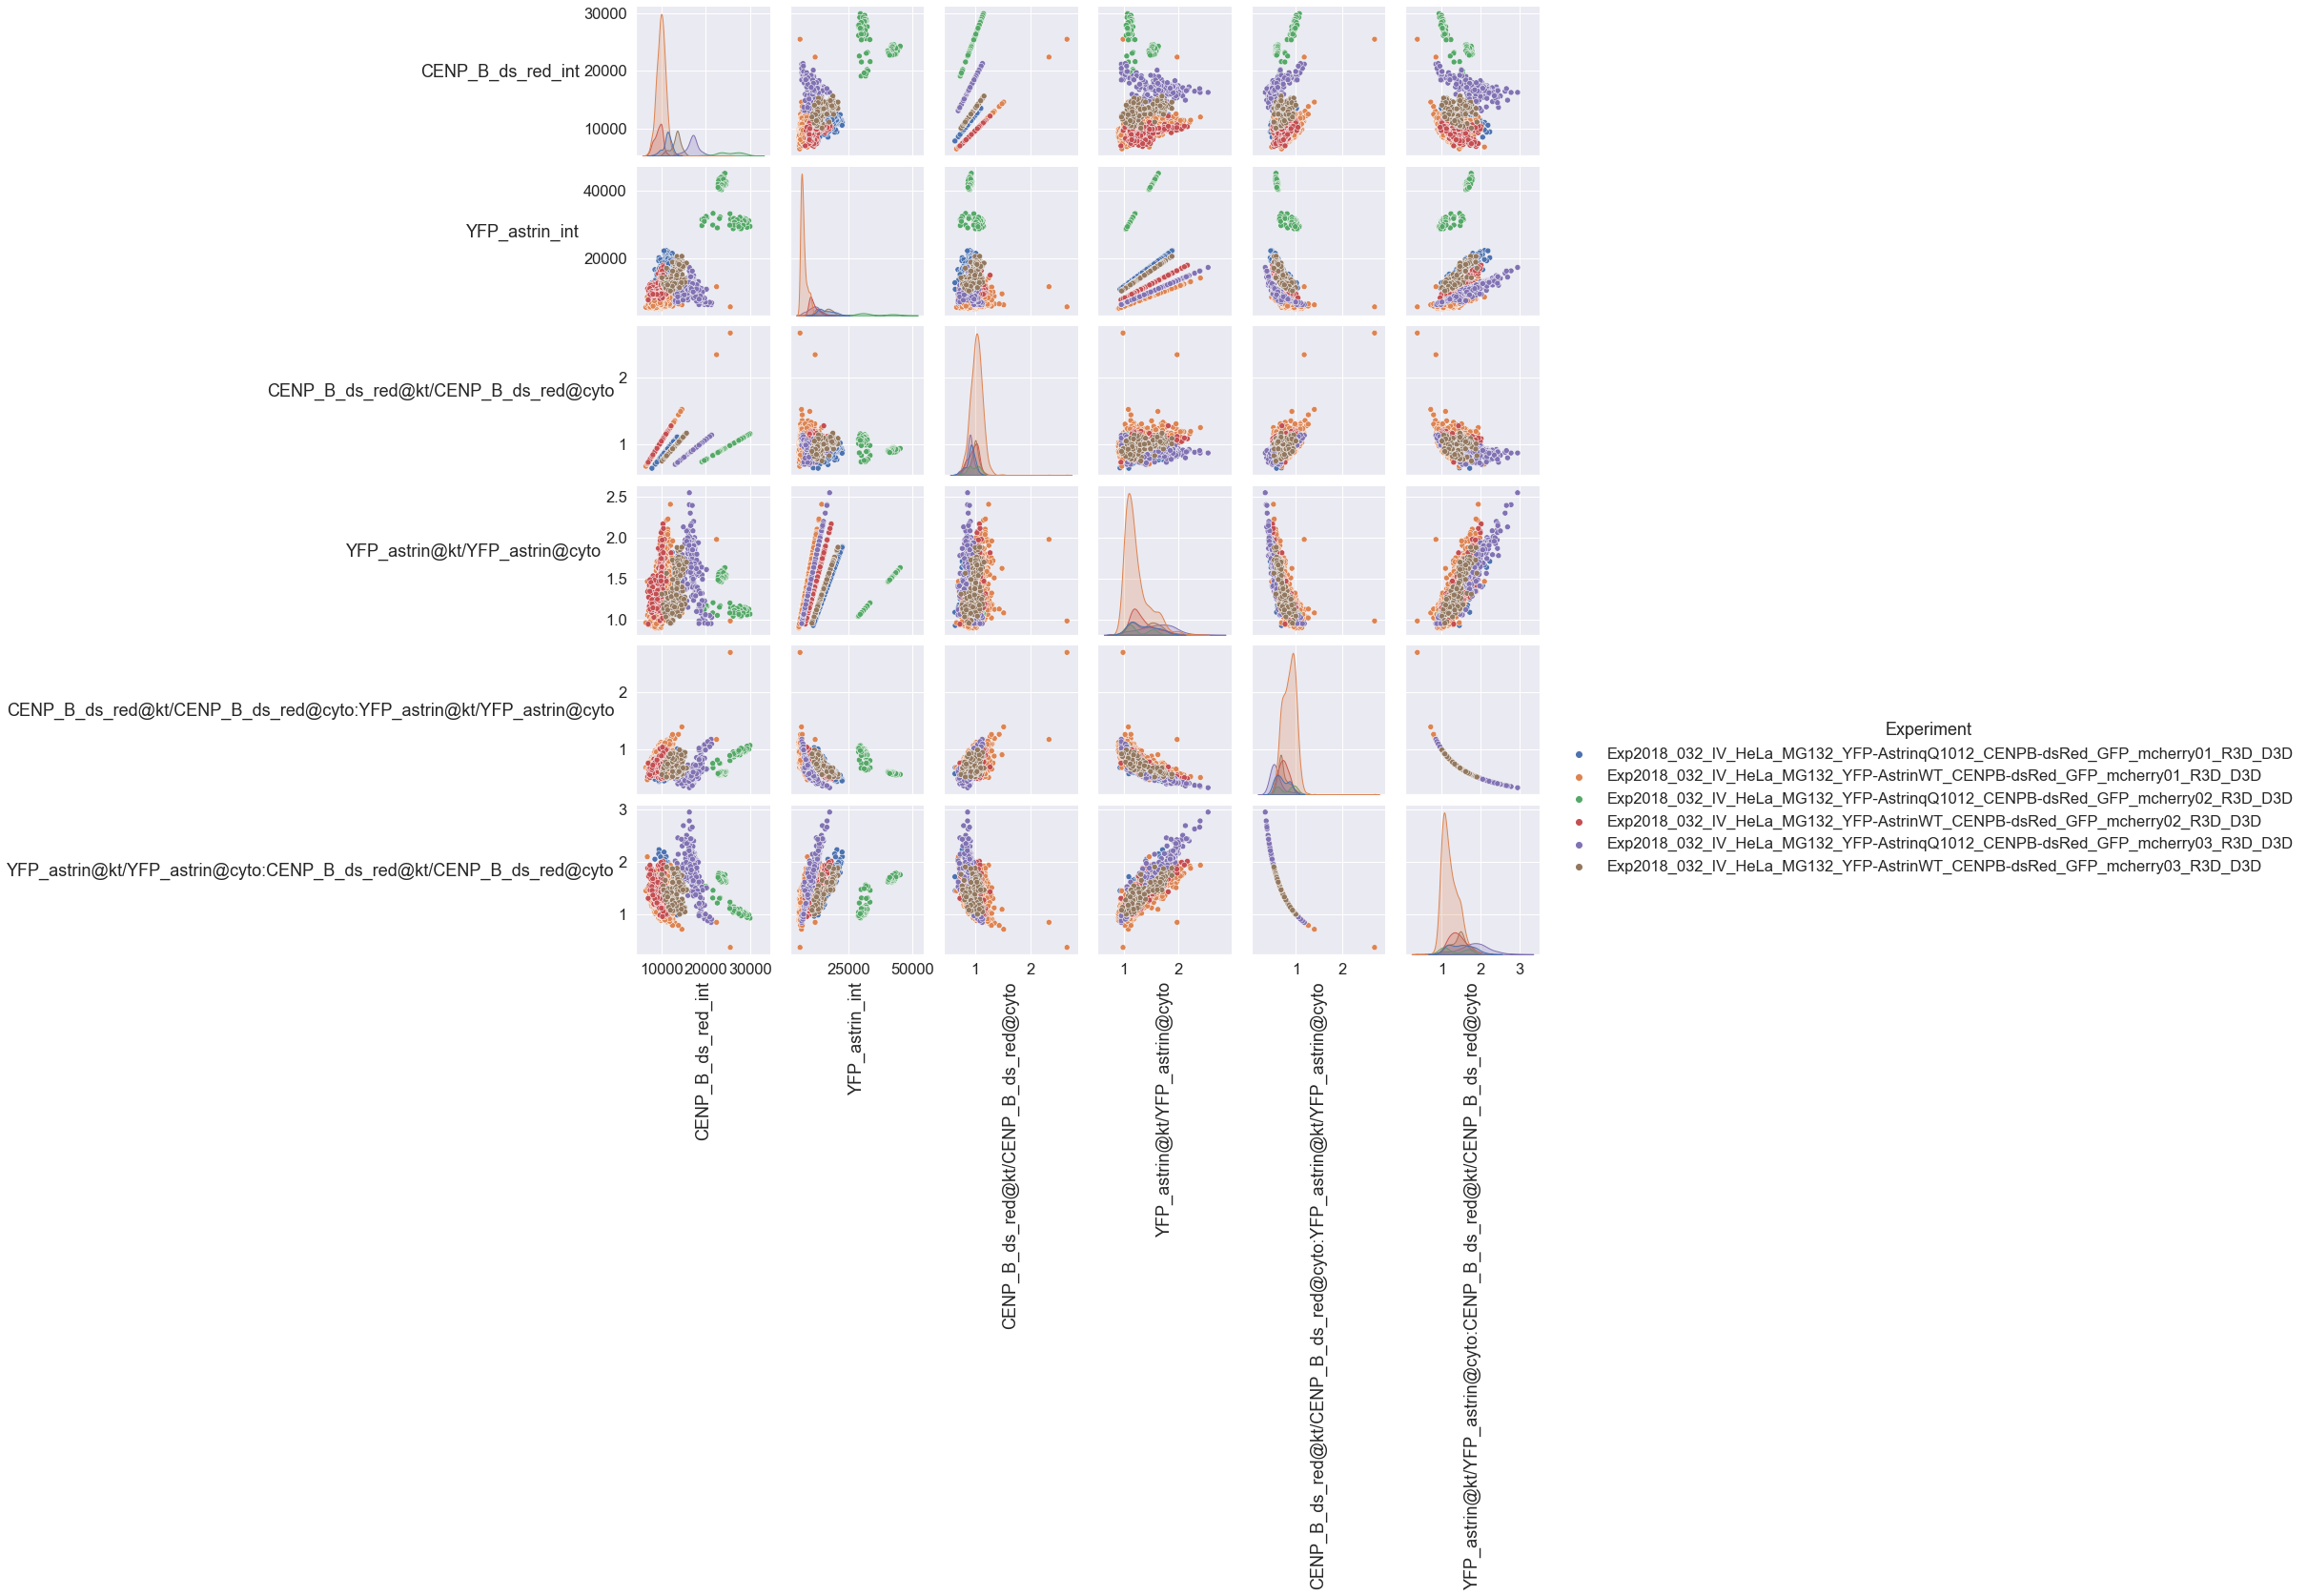

In [20]:
plt.figure(figsize=(15,15))
title="PairPlot - Experiment"
sns.set(font_scale=1.5)

sns_plot=sns.pairplot(df_graph, hue="Experiment")

replacements = {'mean_intensity_CENP_B_ds_red': 'CENP_B_ds_red_int', 
                'mean_intensity_YFP_astrin': 'YFP_astrin_int',
                'YFP_astrin@kt/YFP_astrin@cyto': 'YFP_astrin@kt/YFP_astrin@cyto',
                'CENP_B_ds_red@kt/CENP_B_ds_red@cyto': 'CENP_B_ds_red@kt/CENP_B_ds_red@cyto',
                'YFP_astrin@kt/YFP_astrin@cyto:CENP_B_ds_red@kt/CENP_B_ds_red@cyto':'YFP_astrin@kt/YFP_astrin@cyto:CENP_B_ds_red@kt/CENP_B_ds_red@cyto',
               'CENP_B_ds_red@kt/CENP_B_ds_red@cyto:YFP_astrin@kt/YFP_astrin@cyto':'CENP_B_ds_red@kt/CENP_B_ds_red@cyto:YFP_astrin@kt/YFP_astrin@cyto'}
for i in range(6):
    for j in range(6):
        xlabel = sns_plot.axes[i][j].get_xlabel()
        ylabel = sns_plot.axes[i][j].get_ylabel()
        if xlabel in replacements.keys():
            sns_plot.axes[i][j].set_xlabel(replacements[xlabel],rotation=90)
        if ylabel in replacements.keys():
            sns_plot.axes[i][j].set_ylabel(replacements[ylabel],rotation=0,ha="right")

sns_plot.savefig(GRAPH_DIR+title, bbox_inches="tight",dpi=300)
plt.show()